Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

Assignment Expectations/Steps -

    Import and store the data in a data frame. (2.5 points)
    Remove the outliers from the data (5 points)
    Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.        (2.5 points)
    Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
    Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
    Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
    Print the coefficients & intercepts of the linear regression model (5 points)
    Print the accuracy of the overall model (2.5 points)



1. Import and store the data in a data frame. (2.5 points)

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',sep="\s+|\t| ",names=['City1','City2'
                                                                                            ,'Average Fare',
                                                                                           'Distance',
                                                                                           'Average Weekly Passengers',
                                                                                           'market leading airline',
                                                                                           'market share',
                                                                                           'LEAverage fare',
                                                                                           'Low price airline',
                                                                                           'Lmarket share',
                                                                                           'price'],
                 engine = "python")
df.head()

,City1,City2,Average Fare,Distance,Average Weekly Passengers,market leading airline,market share,LEAverage fare,Low price airline,Lmarket share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


2.Remove the outliers from the data (5 points)

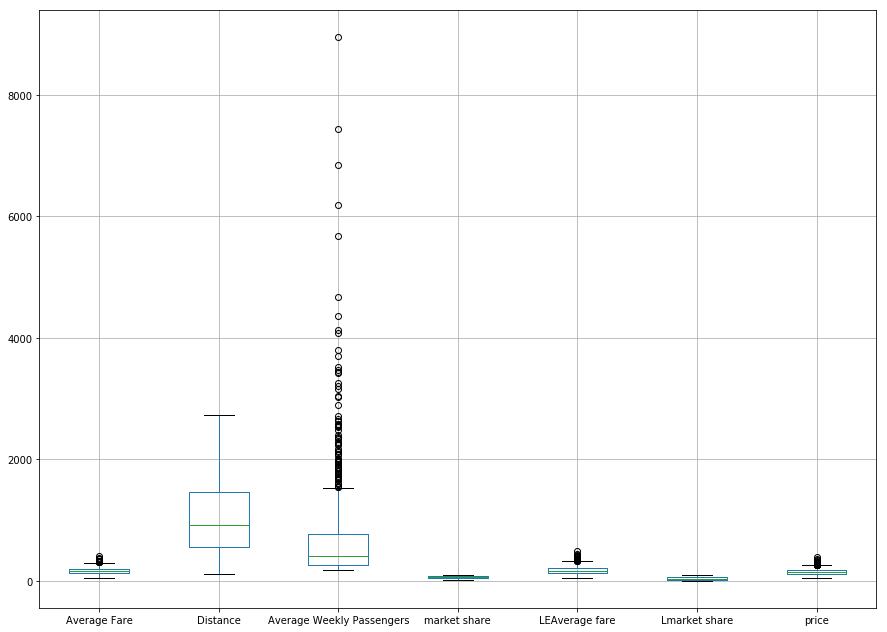

In [97]:
# find the outliers using boxplot
df.boxplot(figsize=(15,11))

In [98]:
#Use (Q1 - 1.5 IQR) as the minimum cap and (Q3 + 1.5 IQR) as the max cap - Formula for removing outliers
#df.describe()
df1 = df._get_numeric_data()
df1.describe()

q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
iqr=q3-q1
df2=df1[~((df1<(q1-1.5*iqr))|(df1>(q3+1.5*iqr))).any(axis=1)]

df.shape,df1.shape, df2.shape


((1000, 11), (1000, 7), (885, 7))

3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.        (2.5 points)
  

In [99]:
df2.corr()

,Average Fare,Distance,Average Weekly Passengers,market share,LEAverage fare,Lmarket share,price
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average Weekly Passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
LEAverage fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
Lmarket share,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


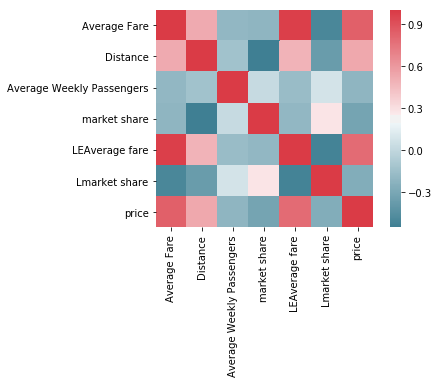

In [100]:
correx = df2.corr()
sns.heatmap(correx,None, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=None)

Average fare is corelated positively with distance,LEAverage fare and Price

4.  Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [115]:
# Since the correlation is less than 0.1 for Average Weekly Passengers , Market share , LMarketshare we will 
# remove them from DF
if ('Average Weekly Passengers','market share','Lmarket share') in df2.columns:
    df2 = df2.drop(['Average Weekly Passengers','market share','Lmarke share'] ,axis =1)

df2.head()

,Average Fare,Distance,LEAverage fare,price
0,114.47,528,111.03,111.03
1,122.47,860,123.09,118.94
2,214.42,852,223.98,167.12
3,69.40,288,68.86,68.86
4,158.13,723,161.36,145.42


5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

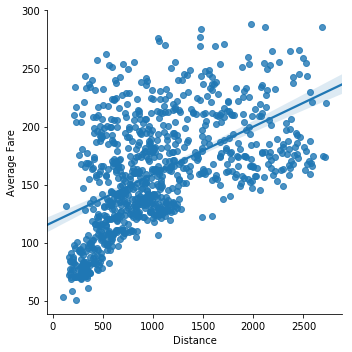

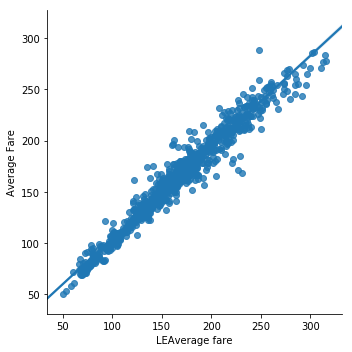

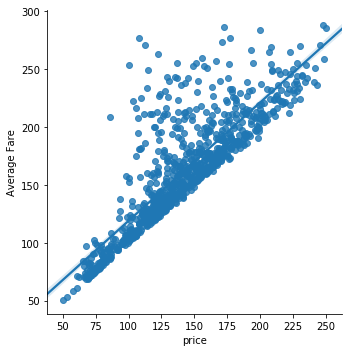

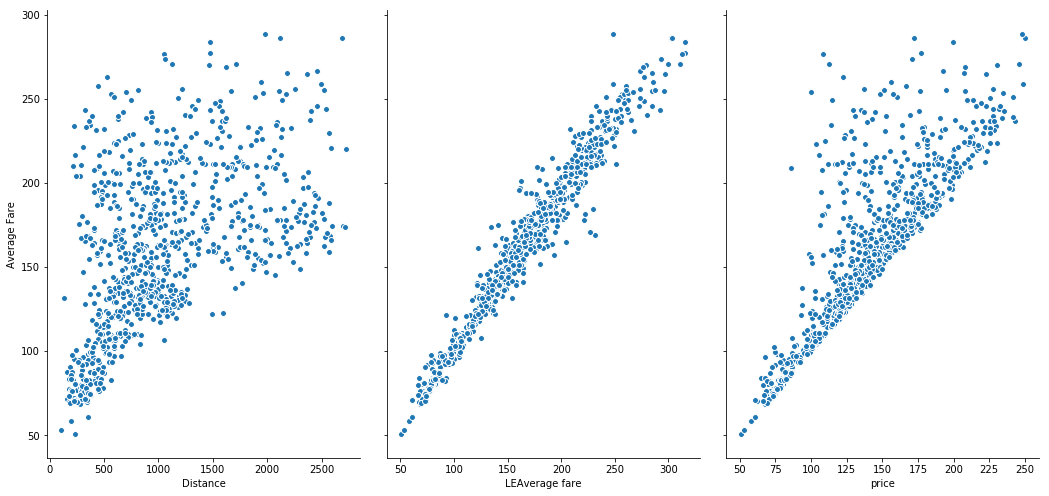

In [ ]:
plot = sns.lmplot(x="Distance",y="Average Fare", data=df2)

plot1 = sns.lmplot(x="LEAverage fare",y="Average Fare", data=df2)

Plot2 = sns.lmplot(x="price",y="Average Fare", data=df2)

sns.pairplot(df2, x_vars=['Distance','LEAverage fare','price'], y_vars='Average Fare', size=7, aspect=0.7)

6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [130]:
df2.info()

Y = df2[['Average Fare']]
X = df2[['Distance','LEAverage fare','price']]

X.shape, Y.shape



<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 999
Data columns (total 4 columns):
Average Fare      885 non-null float64
Distance          885 non-null int64
LEAverage fare    885 non-null float64
price             885 non-null float64
dtypes: float64(3), int64(1)
memory usage: 74.6 KB


((885, 3), (885, 1))

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 250)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

7. Print the coefficients & intercepts of the linear regression model (5 points)

In [136]:
print('Coefficients: \n ', lm.coef_)
print('Intercept:\n',lm.intercept_)

Coefficients: 
  [[0.00252118 0.75648041 0.1984839 ]]
Intercept:
 [6.75426727]


8.Print the accuracy of the overall model (2.5 points)

In [141]:
import numpy as np
from sklearn import metrics

predictions=lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
r_squared = metrics.r2_score(Y_test,predictions)
print('RSquare', r_squared)

lm.score(X_train,Y_train)

MAE: 5.9320241001426215
MSE: 67.6324129809676
RMSE: 8.223892811860306
RSquare 0.9747686283326834


0.9697388191560783